In [1]:
import ugradio
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# 6.1

In [2]:
x = ugradio.pico.capture_data('1V', divisor=1, nsamples=1000)
np.savetxt('data_21', x)

In [3]:
x = ugradio.pico.capture_data('1V', divisor=1, nsamples=1000)
np.savetxt('data_19', x)

## Power Spectra for DSB Mixer Data

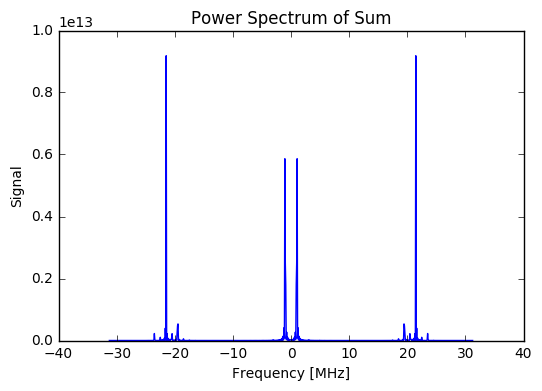

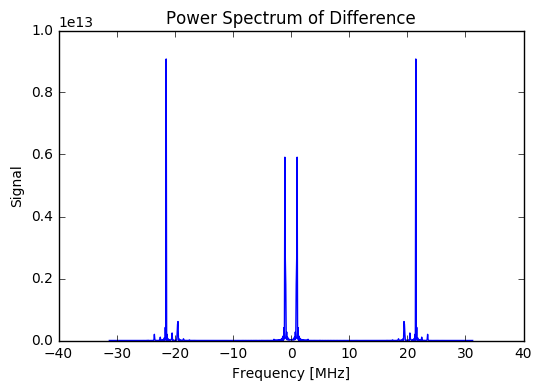

In [26]:
def PS_20(testFile):
    myFile = np.loadtxt(testFile)
    Vsamp = 62.5
    N = 800

    time = np.linspace(-N/(2*Vsamp),(N/2-1)/Vsamp,N)
    f_input = np.linspace(-Vsamp/2, (Vsamp/2)*(1 - (2/N)),N) #N distinct frequencies
    f,fx = ugradio.dft.dft(myFile[:N],t=time, f=f_input, vsamp=Vsamp)
    P = np.abs(fx)**2

    plt.plot(f,P)
    plt.xlabel("Frequency [MHz]")
    plt.ylabel("Signal")
    plt.show()

    
plt.title('Power Spectrum of Sum') 
PS_20('data_21')

plt.title('Power Spectrum of Difference')
PS_20('data_19')

## Waveforms of DSB Data

Vsig = 21MHz


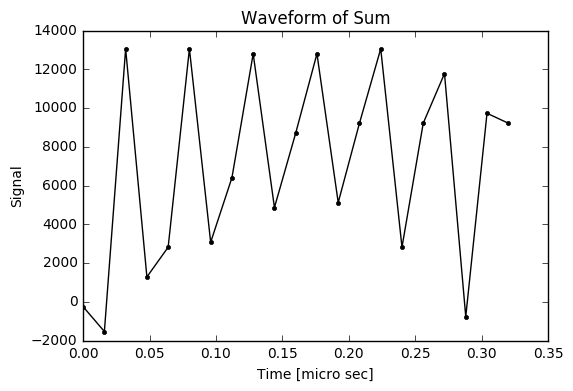

In [25]:
def Wave(file,Vsig):
    
    Vsamp = 62.5 #MHz
    N = 512
    time = np.linspace(-N/(2*Vsamp),(N/2-1)/Vsamp,N)
    
    print('Vsig = {}{}'.format(Vsig, 'MHz'))
    file9 = np.loadtxt(file)
    
    
    
    #time domain signal - plot digitally sampled waveform vs time
    plt.plot(time[N/2:N/2 + 21],file9[N/2:N/2 + 21],'k.-')
    
    plt.xlabel("Time [micro sec]")
    plt.ylabel("Signal")
    plt.show()
    

plt.title('Waveform of Sum')  
Wave('data_21', Vsig = 21)


#### fourier transform of the waveform of the sum

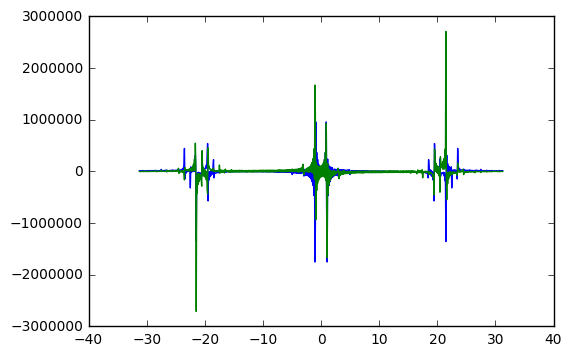

800


In [29]:
Vsamp = 62.5
N = 800
myFile = np.loadtxt('data_21')

time = np.linspace(-N/(2*Vsamp),(N/2-1)/Vsamp,N)
f_input = np.linspace(-Vsamp/2, (Vsamp/2)*(1 - (2/N)),N) #N distinct frequencies
f,fx = ugradio.dft.dft(myFile[:N],t=time, f=f_input, vsamp=Vsamp)
plt.plot(f,fx.real)
plt.plot(f,fx.imag)

plt.show()

#print(len(f))

## Filtered Fourier Transforms

In [31]:
# zeroing both the real and imag portion of sum frequency components
for x in range(0, len(f)):
    if f[x]>= 20 or f[x]<=-21:
        fx.real[x]=0
        fx.imag[x]=0



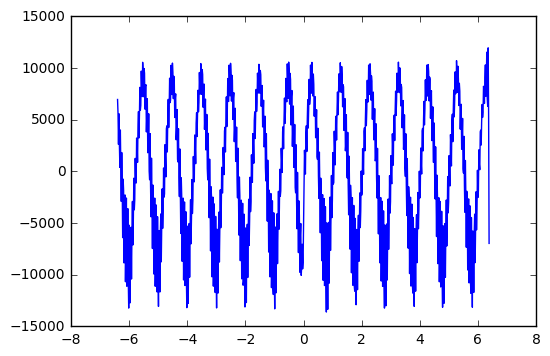

In [33]:
# inverse FT of wavefunction of sum frequency
t, xt = ugradio.dft.idft(fx, f=f, t=time)
plt.plot(t,xt)
plt.show()

# 6.2

# 6.3

## 6.3.1: Non-Delayed Data

In [6]:
x = ugradio.pico.capture_data('1V', divisor=1, dual_mode=True, nsamples=1000)
np.savetxt('data_20_nd', x)

In [7]:
x = ugradio.pico.capture_data('1V', divisor=1, dual_mode=True, nsamples=1000)
np.savetxt('data_30_nd', x)

In [8]:
def PS_25(testFile):
    myFile = np.loadtxt(testFile)
    Vsamp = 25
    N = 800

    time = np.linspace(-N/(2*Vsamp),(N/2-1)/Vsamp,N)
    f_input = np.linspace(-Vsamp/2, (Vsamp/2)*(1 - (2/N)),N) #N distinct frequencies
    f,fx = ugradio.dft.dft(myFile[:N],t=time, f=f_input, vsamp=Vsamp)
    P = np.abs(fx)**2

    plt.plot(f,P)
    plt.xlabel("Frequency [MHz]")
    plt.ylabel("Signal")
    plt.show()


### Difference Frequencies with Small Delay

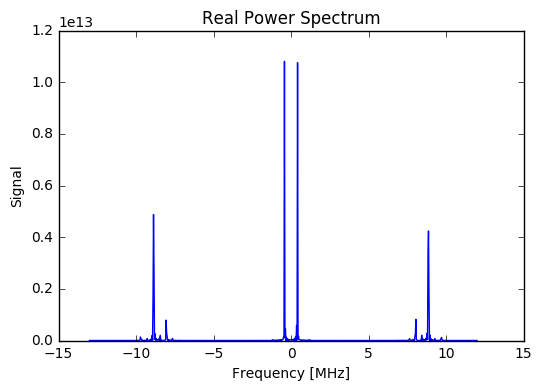

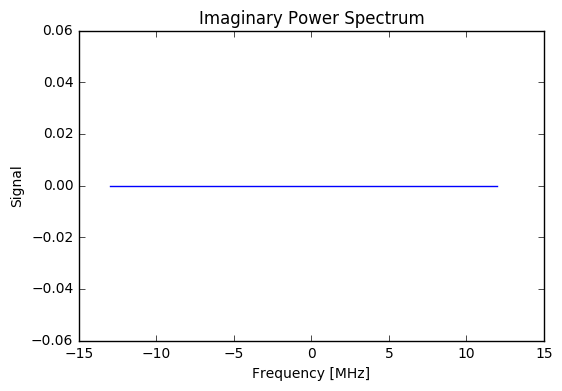

In [9]:
x = np.loadtxt('data_20_nd')
a = x[0:999]
b = x[1000:1999]

plt.title('Real Power Spectrum')
PS_25(a)

plt.title('Imaginary Power Spectrum')
PS_25(b)

### Sum Frequencies with Small Delay

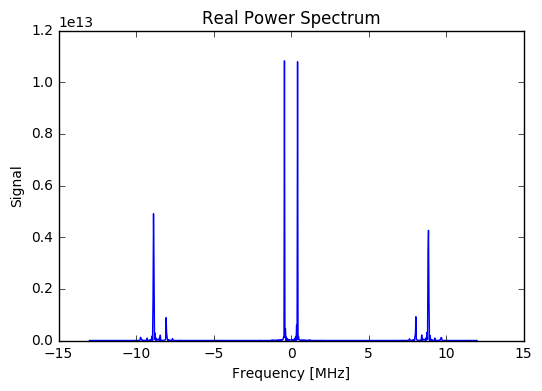

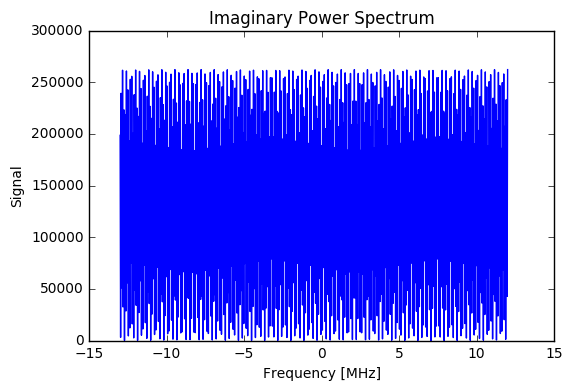

In [10]:
x = np.loadtxt('data_30_nd')
a = x[0:999]
b = x[1000:1999]

plt.title('Real Power Spectrum')
PS_25(a)

plt.title('Imaginary Power Spectrum')
PS_25(b)

## 6.3.2: Delayed Data

In [11]:
x = ugradio.pico.capture_data('1V', divisor=1, dual_mode=True, nsamples=1000)
np.savetxt('data_20_d', x)

In [12]:
x = ugradio.pico.capture_data('1V', divisor=1, dual_mode=True, nsamples=1000)
np.savetxt('data_30_d', x)

### Difference Frequencies with Delay

In [13]:
def Wave_25(file,Vsig):
    
    Vsamp = 25 #MHz
    N = 512
    time = np.linspace(-N/(2*Vsamp),(N/2-1)/Vsamp,N)
    
    print('Vsig = {}{}'.format(Vsig, 'MHz'))
    file9 = np.loadtxt(file)
    
    plt.subplot(3,1,1)
    
    
    #time domain signal - plot digitally sampled waveform vs time
    plt.plot(time[N/2:N/2 + 21],file9[N/2:N/2 + 21],'k.-')
    
    plt.xlabel("Time [micro sec]")
    plt.ylabel("Signal")
    plt.show()

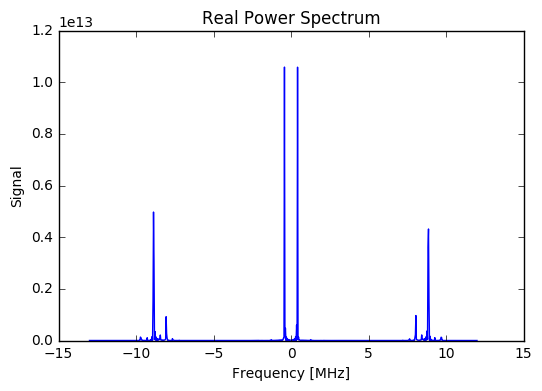

Vsig = 20MHz


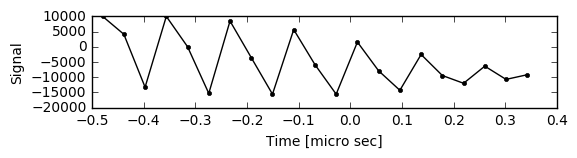

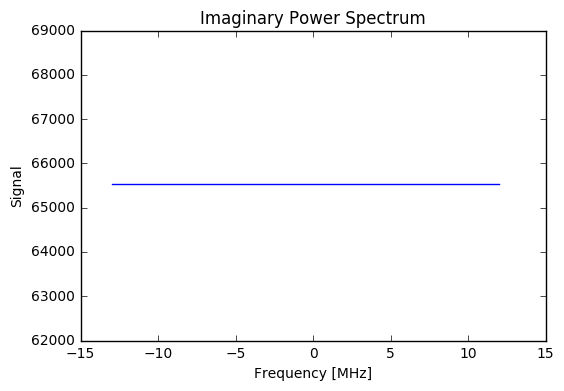

Vsig = 20MHz


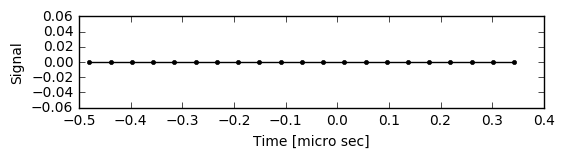

In [16]:
x = np.loadtxt('data_20_d')
a = x[0:999]
b = x[1000:1999]

plt.title('Real Power Spectrum')
PS_25(a)
Wave_25(a, Vsig = 20)

plt.title('Imaginary Power Spectrum')
PS_25(b)
Wave_25(b, Vsig = 20)

### Sum Frequencies with Delay

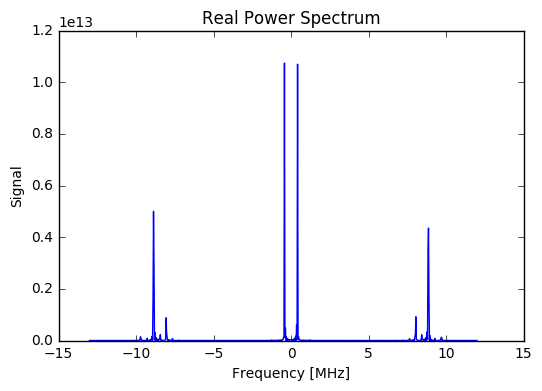

Vsig = 30MHz


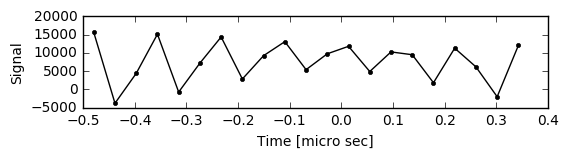

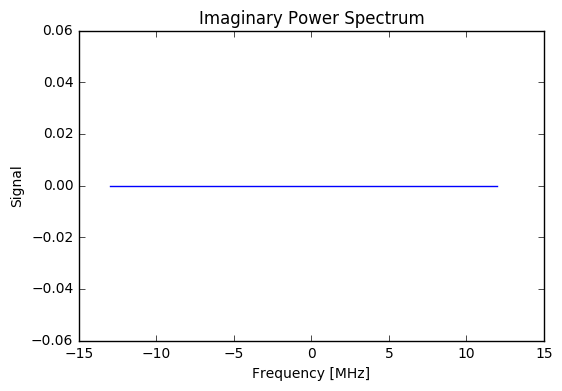

Vsig = 30MHz


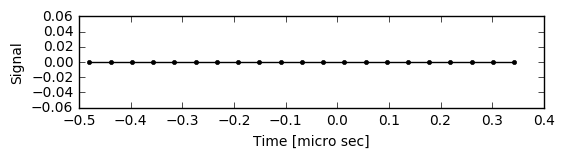

In [17]:
x = np.loadtxt('data_30_d')
a = x[0:999]
b = x[1000:1999]

plt.title('Real Power Spectrum')
PS_25(a)
Wave_25(a, Vsig = 30)

plt.title('Imaginary Power Spectrum')
PS_25(b)
Wave_25(b, Vsig = 30)